# <span style="color: darkorange">Project 4: Clustering
### <span style="color: orange">Fabiola Rojas</span>
---

## <span style="color: darkorange">The Problem</span> 
This project explores how clustering can be used to better understand beer tasting profiles and consumer preferences. Specifically, I aim to answer two related questions:

- Can beers be grouped based on their tasting characteristics, and how do these clusters compare to the labeled beer styles?
- Are there specific clusters of beers that tend to receive higher consumer ratings, and what do those beers have in common?

The dataset contains information on over 3,000 beers, including tasting profile features (such as bitterness, sweetness, and fruitiness), as well as average user ratings for aspects like aroma, appearance, and taste. These attributes provide a foundation for clustering the beers based on both flavor and perception.

This project has two parts: first, to see whether beers naturally form distinct taste-based groupings, and whether those groupings align with traditional style labels (like IPA or Stout); and second, to analyze these clusters to identify which flavor combinations are most associated with highly-rated beers.

This analysis could provide insight into how well beer styles are defined in practice, and what tasting features tend to contribute to a positive consumer experience.

---

## <span style="color: darkorange">What is clustering and how does it work?
Clustering is an unsupervised machine learning technique used to group data points based on similarity. Unlike supervised learning methods that rely on labeled data, clustering finds hidden patterns or groupings within a dataset without predefined categories. The objective is to ensure that items within the same cluster are more similar to each other than to those in other clusters.

One of the most commonly used clustering algorithms is K-Means, which partitions the data into k clusters. It works by:

1. Selecting k initial centroids randomly.

2. Assigning each data point to the nearest centroid based on a distance metric, typically Euclidean distance.

3. Updating the centroids by computing the mean of all points assigned to each cluster.

4. Repeating steps 2 and 3 until the centroids stabilize (converge) or a maximum number of iterations is reached.

Another method is Agglomerative Clustering, a type of hierarchical clustering. This algorithm starts with each data point as its own cluster and iteratively merges the closest pair of clusters until a single cluster or the desired number of clusters is achieved. It builds a dendrogram (tree structure), which can be cut at different levels to yield different numbers of clusters.

Both methods have their strengths: K-Means is efficient and works well with large datasets when clusters are spherical and evenly sized, while Agglomerative Clustering provides a more flexible structure and is often better at handling irregular cluster shapes.

---

## <span style="color: darkorange">The Data
The dataset used in this project is the [Beer Profile and Ratings Dataset](https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set/data?select=beer_profile_and_ratings.csv) available on Kaggle. It contains detailed information on 3,197 unique beers from 934 breweries, integrating both consumer review data and tasting profile features.

The data was compiled by merging two existing Kaggle datasets: the Beer Tasting Profiles Dataset, which provides flavor descriptors based on word frequency in beer reviews, and the 1.5 Million Beer Reviews Dataset, which includes numerical ratings and textual descriptions from beer enthusiasts.

Key features in the dataset include basic information like beer name, style, and brewery, as well as quantitative characteristics (ABV, IBU), tasting profile features, and consumer review scores. The tasting profile features (astringency, sweet, sour, hoppy, etc.) are integer values derived from word counts in up to 25 reviews of each beer. The consumer reviews are on a scale from 1-5. This dataset allows for multi-dimensional analysis of beers—not only how they taste, but how they are perceived by consumers.


---

## <span style="color: darkorange">Data Understanding

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/beer_profile_and_ratings.csv")
pd.set_option('display.max_columns', None)
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [8]:
# check for nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

In [9]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


In [10]:
print("Number of unique beer styles:", df['Style'].nunique())
print("Number of unique breweries:", df['Brewery'].nunique())
print("Number of unique beers:", df['Beer Name (Full)'].nunique())

Number of unique beer styles: 111
Number of unique breweries: 934
Number of unique beers: 3197


The dataset has no missing values, and all data types appear to be correct. Most beers have similar ratings, with a few exceptions showing higher or lower ratings. The tasting profile features vary more significantly, indicating potential for clustering based on these attributes. Next, I'll visualize the data to explore these trends further and identify any clusters or patterns that can guide the clustering process.

## <span style="color: darkorange">Visualization

First I'll perform a few preprocessing steps to make visualization tasks a little easier, including lowercasing all column names, dropping unnecessary columns, and combining related columns.

In [14]:
# lowercase all column names
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'style', 'brewery', 'beer name (full)', 'description', 'abv',
       'min ibu', 'max ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

In [15]:
# drop unnecessary identifier columns
df = df.drop(columns=['name', 'brewery', 'description'])

In [16]:
# combine min ibu and max ibu into a single average ibu column
df['ibu'] = df[['min ibu', 'max ibu']].mean(axis=1)
df = df.drop(columns=['min ibu', 'max ibu'])

### <span style="color: darkorange">Distribution of Reviews

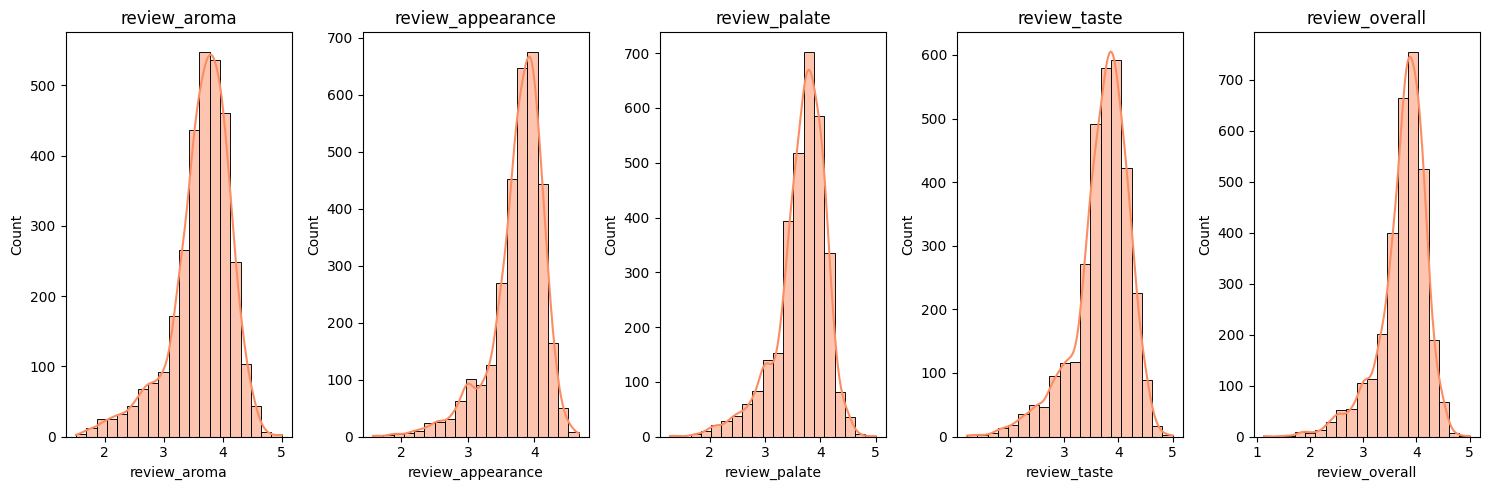

In [18]:
review_cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']

plt.figure(figsize=(15, 5))
for i, col in enumerate(review_cols):
    plt.subplot(1, 5, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='#fc8d62')
    plt.title(col)
plt.tight_layout()
plt.show()


Based on the distribution of the different categories of customer reviews, it looks like beers tend to be rated somewhat favorably, with ratings most commonly being high 3s and low 4s. Most beers aren't rated too harshly. It leaves us to wonder which beers are receiving the lower ratings, which are average, and which exceed expectations.

### <span style="color: darkorange">Most Reviewed Beer Styles vs Ratings

Using number_of_reviews, I selected the top 10 most reviewed beer styles to analyze their ratings. (Each beer style may appear in multiple different beers at multiple different breweries.)

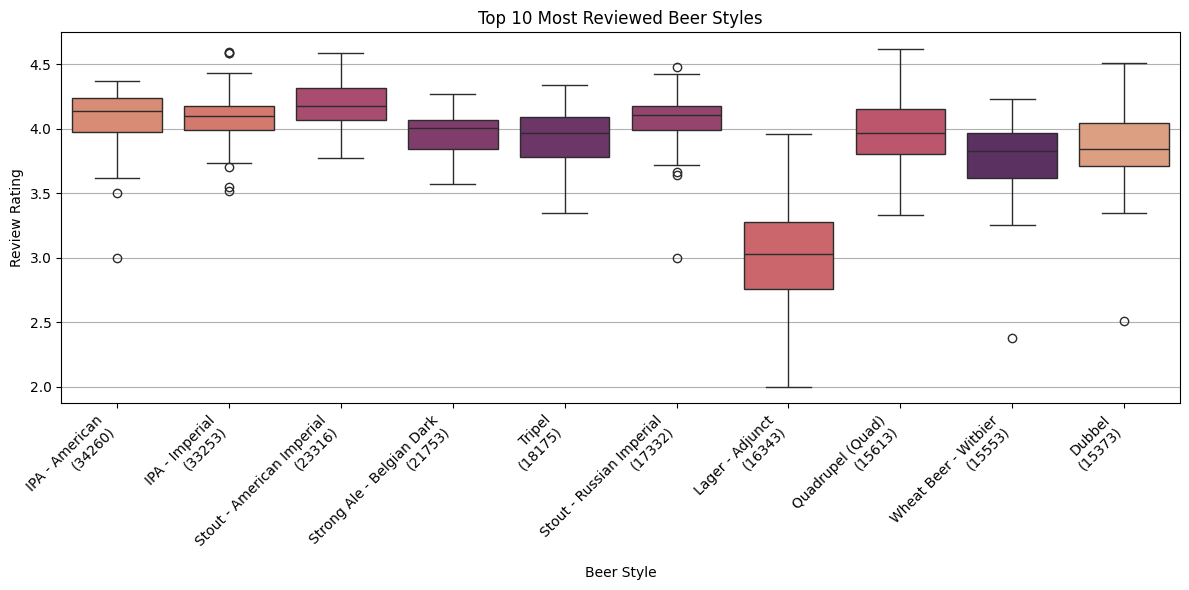

In [22]:
top_common_styles = df.groupby('style')['number_of_reviews'].sum().sort_values(ascending=False).head(10).index

df_top_common_styles = df[df['style'].isin(top_common_styles)]

ordered_styles = df.groupby('style')['number_of_reviews'].sum().sort_values(ascending=False).head(10).index

review_counts = df.groupby('style')['number_of_reviews'].sum().loc[ordered_styles]

plt.figure(figsize=(12, 6))
sns.boxplot(x='style', y='review_overall', data=df_top_common_styles, palette='flare', order=ordered_styles, hue='style', legend=False)

plt.xticks(ticks=range(len(ordered_styles)), labels=[f'{style}\n({review_counts[style]})' for style in ordered_styles], rotation=45, ha='right')
plt.title('Top 10 Most Reviewed Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Review Rating')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Here are the 10 most review beer styles across the entire dataset, ordered from most to least number of reviews. Most of these beers are rated on average close to or above 4. Interestingly, the most commonly reviewed beers have pretty narrow distributions, indicating that they are not only the most popular but that people generally share the same positive opinions on these beers. Surprisingly, the ranges of reviews tend to widen as the number of reviews go down. These 10 beer styles only make up about 9% of all the styles in the dataset, however, so it's likely this trend doesn't continue throughout the whole dataset. It's possible though that the medium-popular beer styles experience more of a variety of ratings, and that the least popular beer styles have the lowest ratings, and that's why they're not popular. Number of reviews and quality of ratings may also just depend on how well known the beer or the brewery is and may not reflect the actual quality of the beer based on objective tasting profile features. Additionally, the range of review counts in just these 10 beer styles indicates imbalance in the data that will need to be handled with scaling. Let's see if there's a trend with reviews.

### <span style="color: darkorange">Number of Reviews vs Overall Rating

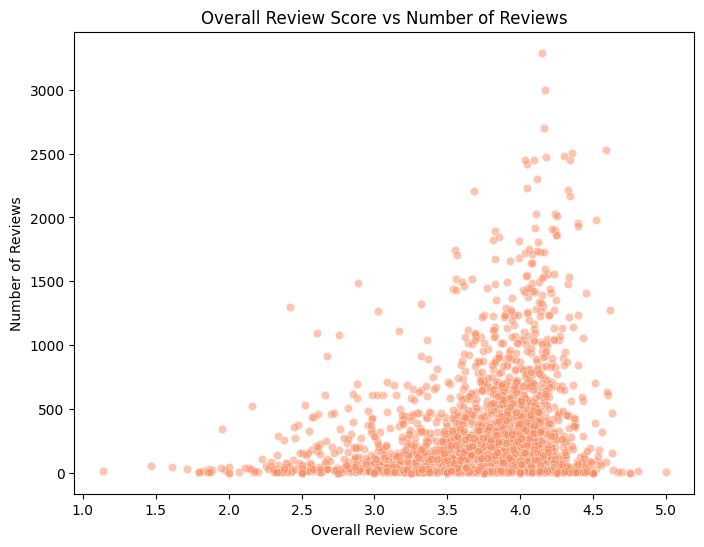

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='review_overall', y='number_of_reviews', alpha=0.5, color='#fc8d62')
plt.title('Overall Review Score vs Number of Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Overall Review Score')
plt.show()


Again, we can see that most beers are rated somewhat favorably and are in the 3.5-4.0 range. Beers rated between 4.0-4.5 tend to receive more reviews, likely because they end up becoming popular and recommended more. A relatively small number of beers exceed 4.0, and more beers tend to fall below 3.5, indicating that people are pretty critical in their tastes. There are some beers with low ratings and a greater number of reviews, indicating the beer may come from a popular brewery, for example, but it's not everyone's favorite style. Most of the beers with low ratings don't have as many reviews, meaning they are likely niche or unpopular beers that don't get much attention. There is a slight trend where overall rating increases as number of reviews increase, but it looks like generally people will review honestly despite how well-known or popular the  beer is, and better tasting beers naturally tend to attract a greater audience.  Let's get a glimpse at the most and least palatable beers in the dataset.

### <span style="color: darkorange">Highest and Lowest Rated Beer Styles

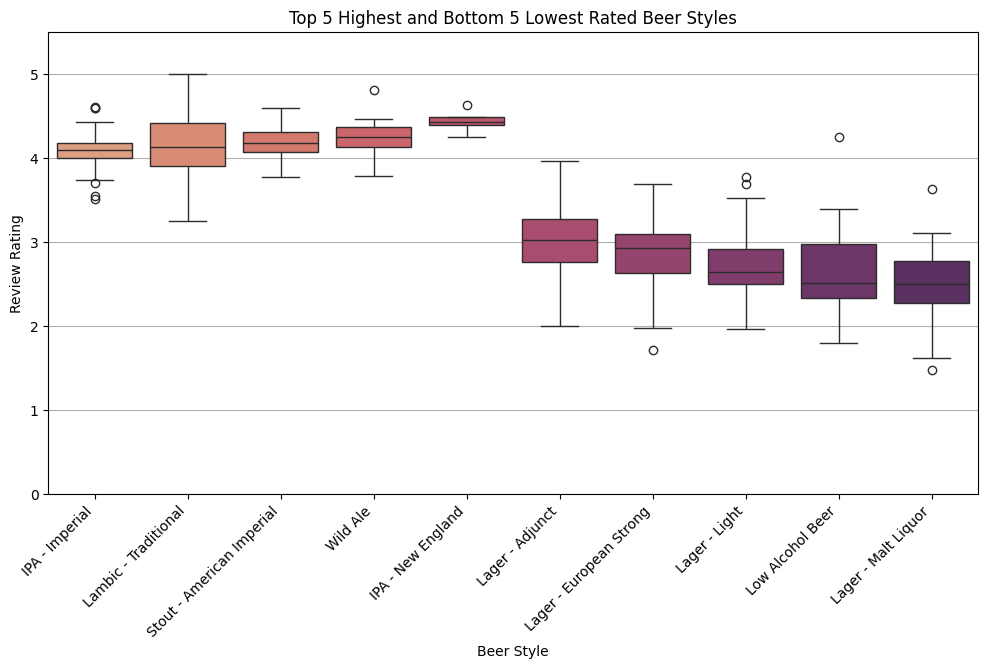

In [28]:
avg_ratings_by_style = df.groupby('style')['review_overall'].mean().sort_values()

top_5_styles = avg_ratings_by_style.tail(5).index

bottom_5_styles = avg_ratings_by_style.head(5).sort_values(ascending=False).index

df_top_5_styles = df[df['style'].isin(top_5_styles)]
df_bottom_5_styles = df[df['style'].isin(bottom_5_styles)]

df_combined = pd.concat([df_top_5_styles, df_bottom_5_styles])

ordered_styles = pd.concat([avg_ratings_by_style.tail(5), avg_ratings_by_style.head(5).sort_values(ascending=False)]).index
df_combined['style'] = pd.Categorical(df_combined['style'], categories=ordered_styles, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='style', y='review_overall', data=df_combined, palette='flare', hue='style', legend=False)
plt.title('Top 5 Highest and Bottom 5 Lowest Rated Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Review Rating')
plt.ylim(0, 5.5) 
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.show()


Two of the most commonly rated beer styles, IPA-Imperial and Stout-American Imperial, also appear in the highest rated beers. IPAs appear twice in the highest rated beers and most common beers, so there is something about an IPA's tasting profile that people really enjoy. The lowest rated beers are almost all lagers, so there is something about this tasting profile that people really dislike.

### <span style="color: darkorange">Tasting Profiles for Highest and Lowest Rated Beer Styles

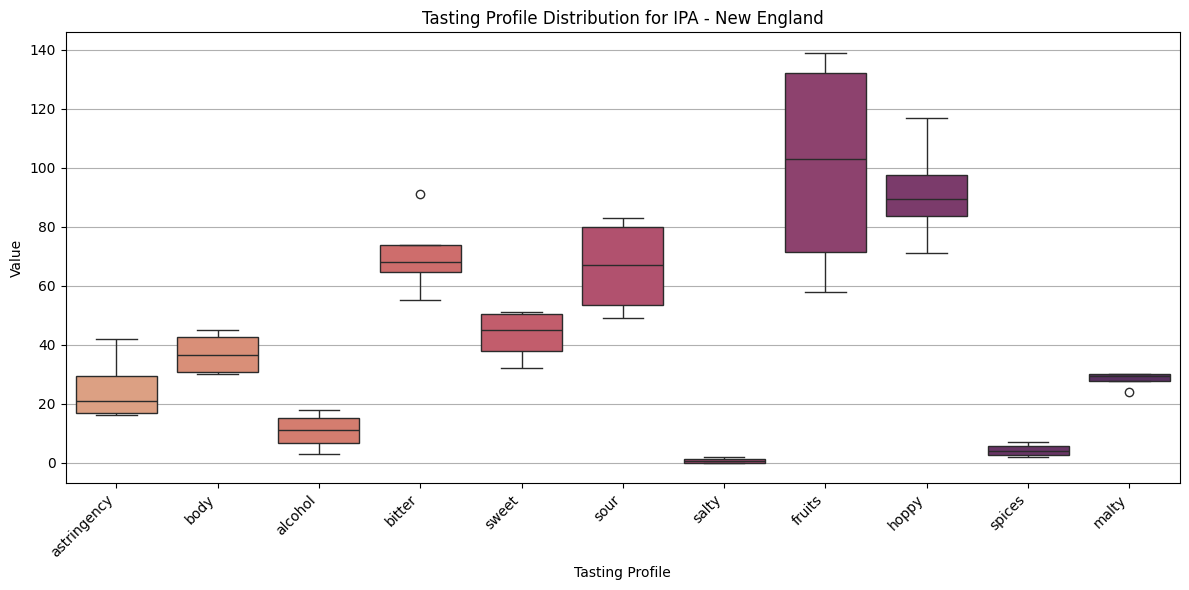

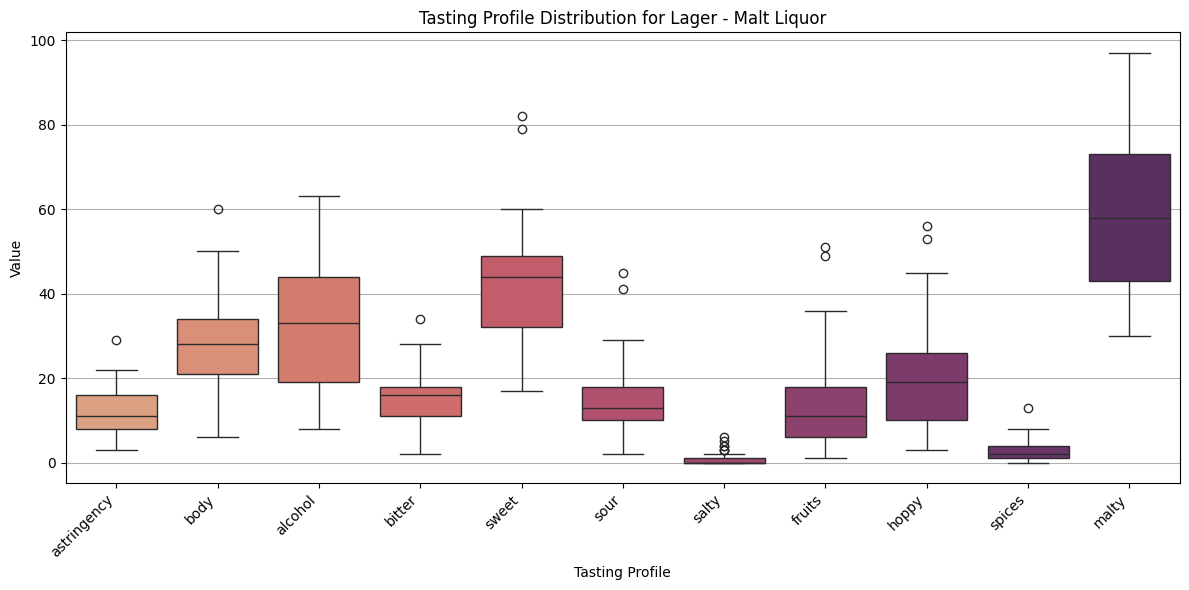

In [31]:
df_ipa_new_england = df[df['style'] == 'IPA - New England']

profile_cols = ['astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']

df_melted = df_ipa_new_england[profile_cols].melt(var_name='Tasting Profile', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Tasting Profile', y='Value', data=df_melted, palette='flare', hue='Tasting Profile', legend=False)
plt.title('Tasting Profile Distribution for IPA - New England')
plt.xlabel('Tasting Profile')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

df_lager_malt_liquor = df[df['style'] == 'Lager - Malt Liquor']

df_melted_lager = df_lager_malt_liquor[profile_cols].melt(var_name='Tasting Profile', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Tasting Profile', y='Value', data=df_melted_lager, palette='flare', hue='Tasting Profile', legend=False)
plt.title('Tasting Profile Distribution for Lager - Malt Liquor')
plt.xlabel('Tasting Profile')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


The biggest difference I can find between the highest and lowest rated beer styles is that IPA - New England has a more bitter, sour, fruity, and hoppy taste, while Lager - Malt Liquor has a more alcoholic, sweet, and malty taste. Both have similar levels of astringency, body, sweetness, saltiness, and spices. Let's see how the tasting profile features interact.

### <span style="color: darkorange">Analysis of Tasting Profile Feature Interactions and Consumer Reviews
The tasting profile features are split into three subgroups: mouthfeel (astringency, body, alcohol), taste (bitter, sweet, sour, salty), and flavor/aroma (fruits, hoppy, spices, malty). I think we can expect features within subgroups to work independently of each other, and expect more correlation among features of different subgroups.

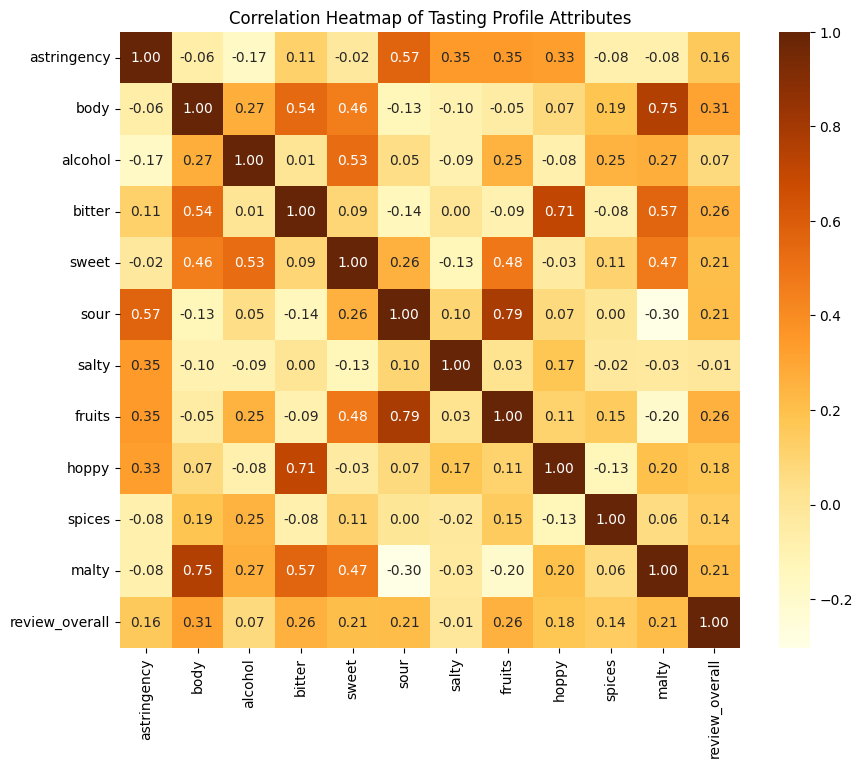

In [34]:
profile_cols2 = profile_cols + ['review_overall']
plt.figure(figsize=(10, 8))
sns.heatmap(df[profile_cols2].corr(), annot=True, cmap='YlOrBr', fmt=".2f")
plt.title("Correlation Heatmap of Tasting Profile Attributes")
plt.show()


Based on the heatmap, it looks like my initial hypothesis about interaction between tasting profile features was correct, and features tend to correlate more with features outside their subgroup. The strongest correlations are malty and body, hoppy and bitter, fruits and sour. There are also correlations (above 0.5) present between malty and bitter, malty and sweet, sour and astringency, sweet and alcohol, and bitter and body. It is very unlikely to find a beer that is malty and sour or malty and fruity. Consumers tend to prefer a bitter and fruity beer with more body. This is very similar to the attributes of IPA - New England.

## <span style="color: darkorange">Pre-Processing

Let's move on to scaling the features to prepare for modeling.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# features for clustering
feature_cols = [
    'abv', 'ibu', 'astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
    'salty', 'fruits', 'hoppy', 'spices', 'malty',
    'review_aroma', 'review_appearance', 'review_palate', 
    'review_taste', 'review_overall', 'number_of_reviews'
]

# for comparison later
styles = df['style']

In [40]:
# scaling
X = df[feature_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
X_scaled_df.head()

,abv,ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,-0.481696,0.444361,-0.337764,-0.544620,-0.464895,0.412438,0.458897,-0.004066,-0.477041,-0.171238,0.528815,-0.435553,0.893892,-0.277850,-0.291487,-0.231379,-0.114903,0.224124,0.728987
1,0.264397,0.444361,-0.433834,0.419002,0.054477,-0.130468,-0.095428,-0.479264,-0.477041,-0.449949,-0.194896,-0.267152,0.217253,0.317111,0.227495,0.542245,0.631911,0.645588,0.684759
2,-0.599501,0.444361,-0.241694,-0.351895,-0.638019,0.218543,-0.445528,-0.619028,-0.477041,-0.883498,0.430127,-0.603954,-0.334083,-0.455100,-0.216397,-0.132554,-0.139523,0.186208,0.397271
3,0.774882,0.444361,-0.337764,0.341912,0.804681,0.412438,1.246621,-0.423358,-0.008068,0.324247,-0.030416,-0.098752,1.094378,1.012280,0.693124,1.090072,0.985079,0.580600,0.372393
4,0.264397,0.444361,0.815081,0.187733,0.516141,0.296101,-0.387178,-0.674933,-0.008068,-0.852530,0.331439,0.069649,0.492921,-0.027406,0.544349,0.164376,0.123714,0.157999,-0.379497


StandardScaler transforms each feature so that it has a mean of 0 and standard deviation of 1, making the data ideal for k-means clustering by ensuring that all features may contribute equally to distance calculations.

## <span style="color: darkorange">Modeling

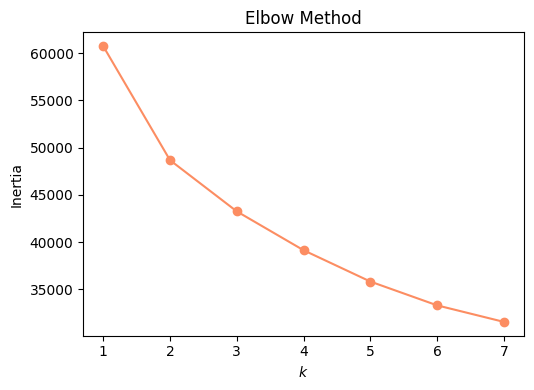

In [43]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1,8), inertia, marker='o', color='#fc8d62')
plt.title('Elbow Method')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()


It looks like 2 is the optimal value for k but I think 3 is a more reasonable number of clusters for this dataset.

In [45]:
# fit k means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your original dataframe
df['kmeans_cluster'] = clusters


In [46]:
# Group by KMeans clusters and get mean values for interpretation
cluster_summary = df.groupby('kmeans_cluster')[
    ['abv', 'ibu', 'astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
     'salty', 'fruits', 'hoppy', 'spices', 'malty',
     'review_aroma', 'review_appearance', 'review_palate', 
     'review_taste', 'review_overall', 'number_of_reviews']
].mean()

cluster_summary


,abv,ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
kmeans_cluster,,,,,,,,,,,,,,,,,,,
0,5.859135,25.817909,20.248197,38.875601,11.039663,32.743990,51.606971,43.269231,1.319712,43.915264,44.856370,17.446514,65.738582,3.707975,3.818442,3.742679,3.785568,3.855517,200.798678
1,4.960092,18.760989,12.868132,25.342491,11.100733,19.382784,32.391941,14.606227,1.075092,15.373626,25.641026,8.831502,48.347985,2.831038,3.109058,2.918432,2.865451,3.034372,138.752747
2,8.518754,43.539007,12.241135,69.858156,30.493414,51.862209,83.821682,26.333333,0.475177,42.259372,42.750760,25.124620,106.429585,3.968988,4.003407,3.932225,4.025490,3.959959,340.348531


## <span style="color: darkorange">Clustering Analysis

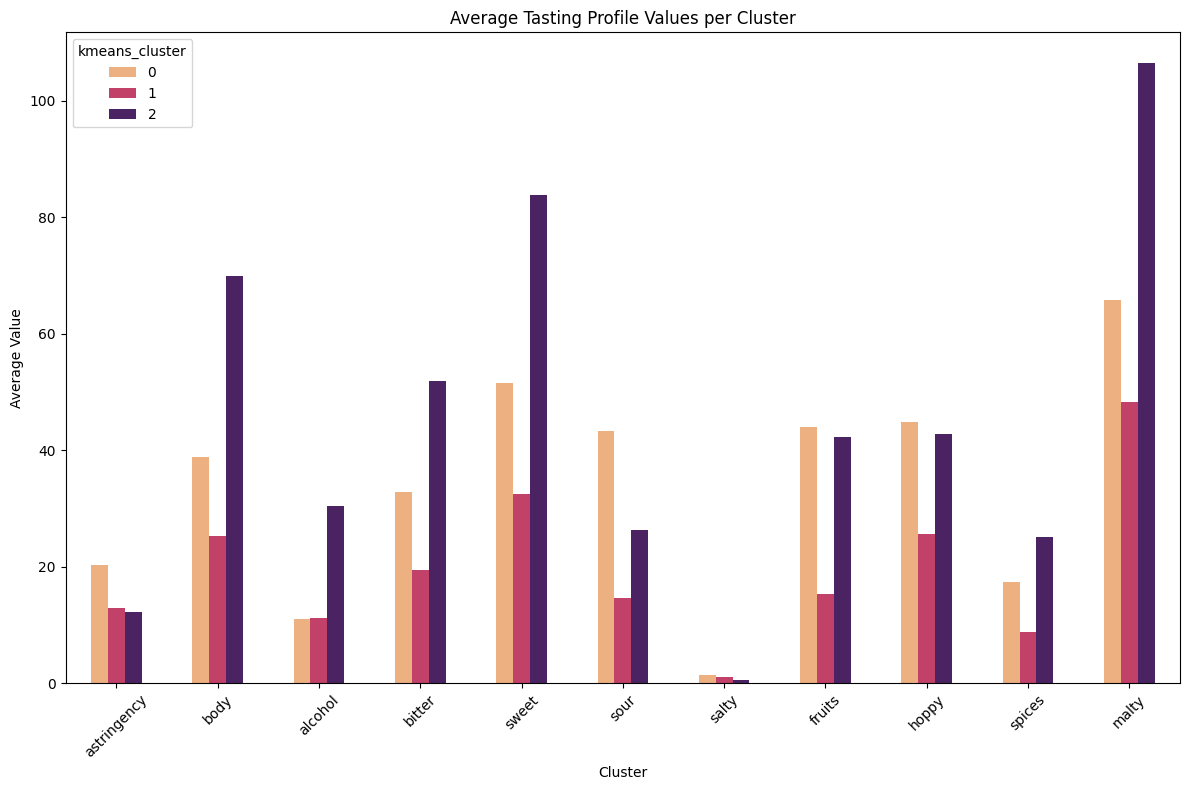

In [48]:
profile_cols = ['astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']

cluster_summary_profile = cluster_summary[profile_cols]

cluster_summary_profile.T.plot(kind='bar', figsize=(12, 8), colormap='flare')

plt.title('Average Tasting Profile Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cluster 2 beers are very malty and sweet with more body. Cluster 0 is a milder version of these flavors with more sourness and a bit more astringency. Cluster 1 is very mild overall with low flavor profile values. Based on this it is possible that cluster 2 contains the Lager - Malt Liquor we viewed earlier. Overall, cluster 2 is very bold, cluster 1 is very mild, and cluster 0 is middle ground.

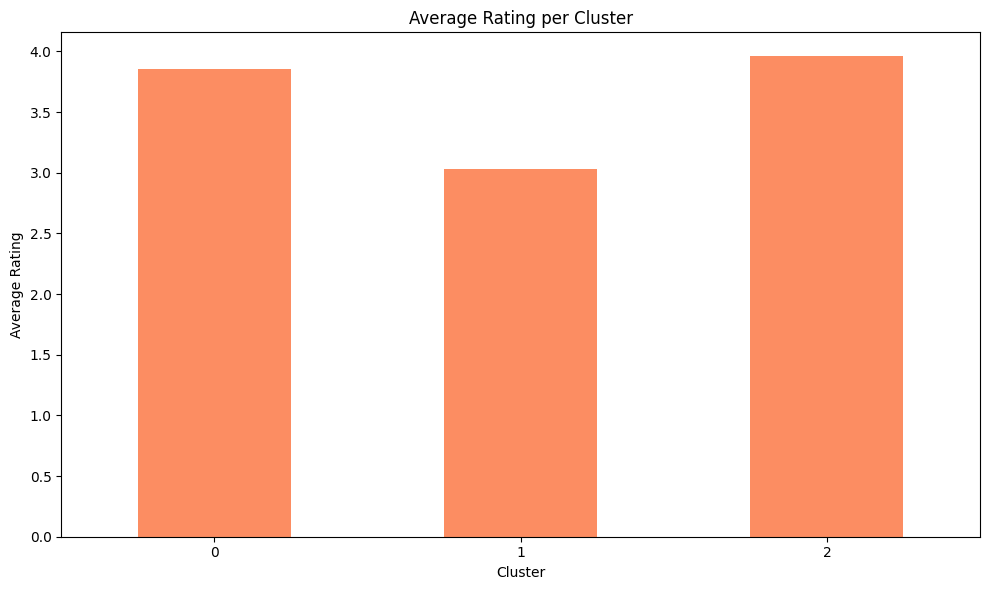

In [50]:
# Group by KMeans clusters and calculate the mean of the review_overall column
avg_review_per_cluster = df.groupby('kmeans_cluster')['review_overall'].mean()

# Create a bar plot to show the average review for each cluster
plt.figure(figsize=(10, 6))
avg_review_per_cluster.plot(kind='bar', color='#fc8d62')

# Set the title and labels
plt.title('Average Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Based on the average rating per cluster, it is unlikely cluster 2 contains the lager from earlier as it was the lowest rated beer and cluster 2 averages the highest ratings, despite the tasting profile being very similar. The lager is probably in cluster 1 as it has the lowest average rating - about 3.0.

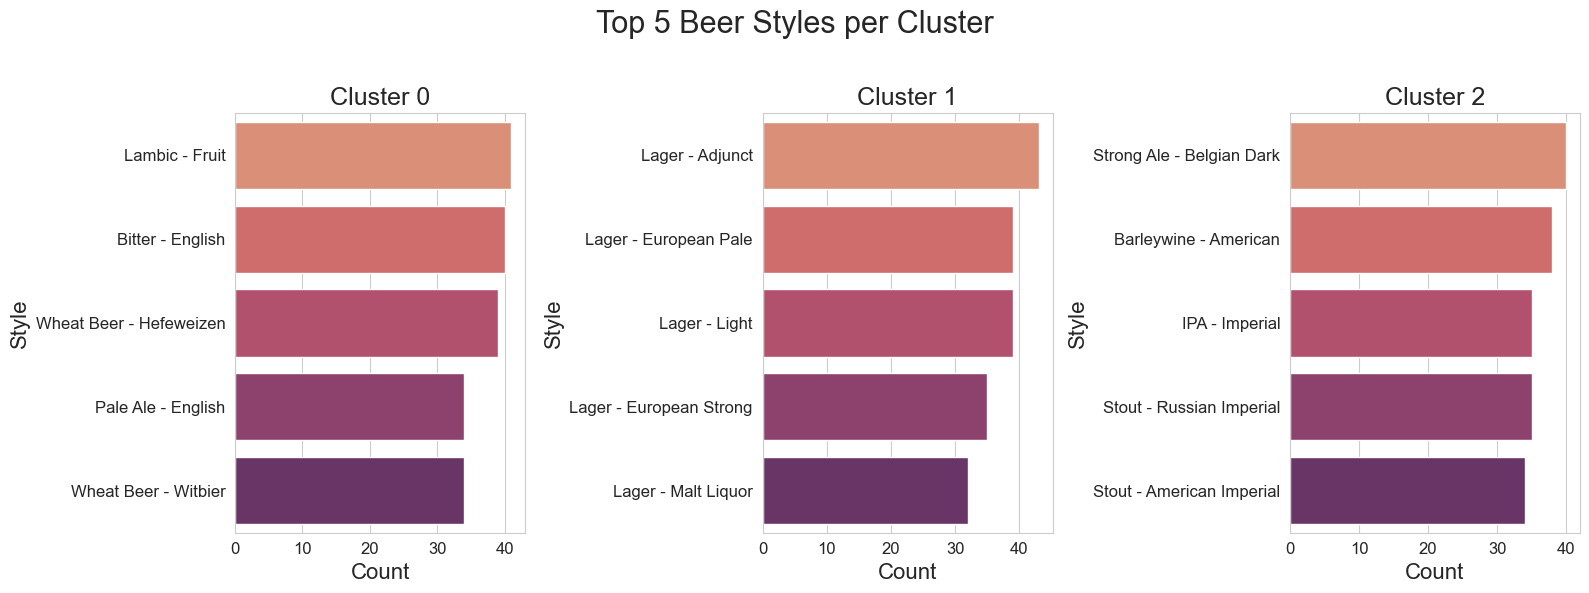

In [52]:
top_styles_per_cluster = df.groupby(['kmeans_cluster', 'style']).size().reset_index(name='count')

top_styles_per_cluster = (
    top_styles_per_cluster
    .sort_values(['kmeans_cluster', 'count'], ascending=[True, False])
    .groupby('kmeans_cluster')
    .head(5)
)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=False)
axes = axes.flatten() 

for i in range(0,3):
    cluster_data = top_styles_per_cluster[top_styles_per_cluster['kmeans_cluster'] == i]
    styles = cluster_data['style'].tolist()

    sns.barplot(data=cluster_data, x='count', y='style', ax=axes[i], palette='flare', hue='style', dodge=False)

    axes[i].set_title(f'Cluster {i}', fontsize=18)
    axes[i].set_xlabel('Count', fontsize=16)
    axes[i].set_ylabel('Style', fontsize=16)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

fig.suptitle('Top 5 Beer Styles per Cluster', fontsize=22)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Cluster 0 contains one beer that we've seen before (Wheat Beer - Witbier) which ranked at number 9 for most rated beers. It also contains another Wheat Beer and a Lambic (Fruit). Lambic - Traditional was the 4th highest rated beer, so perhaps it's similar. With our knowledge of the trends between number of reviews and ratings, the popularity and relatively high rating of the beer styles in this cluster align with what we've found in our analysis.

Cluster 1 contains all lagers, so we already know this contains the lowest rated beers. We expected this group to contain more of those malty and sweet flavors like Lager - Malt Liquor, but looking back at our early visuals we can see that those profile values are not as high as the profile values in cluster 2, so it's likely this beer was just an outlier.

Cluster 2 contains three beers that we've seen before: IPA - Imperial (5th highest rated), Stout - Russian Imperial (6th most rated), and Stout - American Imperial (3rd highest rated). This alone shows us cluster 2 contains the most highly rated and popular beer styles. Cluster 2 also has the highest body value, and body has the strongest correlation with rating.


## <span style="color: darkorange">Storytelling

The clustering analysis reveals distinct beer groupings based on tasting profiles. Cluster 2, which includes malty, sweet, and body-heavy beers, aligns with higher-rated styles like IPA - Imperial. Cluster 0, milder with more sourness and astringency, reflects beers with medium ratings, while Cluster 1, characterized by low flavor intensity, contains lagers that typically have lower ratings.

The clusters confirmed that IPA and Stout styles, known for their bitter and fruity profiles, tend to be highly rated, while lagers tend to be lower rated. This answers the initial questions about whether beers group naturally by taste and which flavor profiles are associated with higher ratings. The clusters suggest that beers with bold flavors are generally rated higher, providing insight into the factors driving consumer preferences.

## <span style="color: darkorange">Impact

This project has several potential social, ethical, and industry-related impacts. In terms of consumer choice, the findings can guide consumers in selecting beers by highlighting the flavor profiles associated with higher ratings. However, this could limit beer exploration by focusing only on popular styles and neglecting less well-known or unique beers. For the beer industry, breweries may use this analysis to adjust their recipes, emphasizing flavors like bitter and fruity or malty and sweet to appeal to consumer preferences. While this could improve sales, it may also lead to more homogenized beer styles, stifling innovation in the market. From a social and cultural perspective, this project could foster broader appreciation for diverse beer styles, but it may also reinforce narrow taste standards, limiting the openness to trying new or unconventional beers. Ethically, there is a risk that consumer behavior could be overly influenced by the data, leading to more commercialized beers that prioritize popular taste profiles. This could marginalize beers that don’t fit these "successful" flavor trends, potentially manipulating consumer preferences. 

In conclusion, while the project provides valuable insights into beer preferences, it also raises concerns about reinforcing narrow taste standards and reducing diversity in the beer market. While the findings could encourage both consumers and breweries to explore more variety, they should be used mindfully to avoid over-commercialization.

## <span style="color: darkorange">References
1. ChatGPT for debugging.